<a href="https://colab.research.google.com/github/KazumaShachou/MachineLearningAndDeepLeaning/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.3.0'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full ),(x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
#in fashion mnist every image is represented as a 28×28
x_train_full.shape

(60000, 28, 28)

In [5]:
x_train_full.dtype

dtype('uint8')

In [6]:
x_valid, x_train = x_train_full[:5000]/ 255.0, x_train_full[5000:]/ 255.0
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Coat'

In [9]:
#Model Using the Sequential API
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(500, activation='relu'))
model.add(keras.layers.Dense(600, activation='relu'))
model.add(keras.layers.Dense(765, activation='relu'))
model.add(keras.layers.Dense(150, activation = 'relu'))
model.add(keras.layers.Dense(40, activation='softmax'))

In [10]:
#the model runs the risk of overfitting, don't have trainable params now, so we need change this
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 600)               300600    
_________________________________________________________________
dense_2 (Dense)              (None, 765)               459765    
_________________________________________________________________
dense_3 (Dense)              (None, 150)               114900    
_________________________________________________________________
dense_4 (Dense)              (None, 40)                6040      
Total params: 1,273,805
Trainable params: 1,273,805
Non-trainable params: 0
______________________________________________

In [11]:
model.layers

In [12]:
model.layers[1].name

'dense'

In [13]:
weights, biases = model.layers[1].get_weights()
weights

array([[-0.01354812, -0.00671787,  0.02214655, ...,  0.02109221,
        -0.01314471, -0.04286741],
       [-0.03487934, -0.06813908,  0.02065484, ...,  0.03467772,
        -0.03655472,  0.00875601],
       [ 0.01710715,  0.03770436,  0.0554769 , ..., -0.00909793,
        -0.06177099,  0.04054441],
       ...,
       [ 0.01594512,  0.00028888, -0.04888004, ..., -0.00373524,
        -0.0619273 ,  0.02198216],
       [-0.00913693, -0.03647077, -0.04784844, ...,  0.00137716,
        -0.03210088, -0.00821583],
       [-0.00985109, -0.05756483, -0.00320009, ...,  0.0678857 ,
         0.04832718,  0.02665135]], dtype=float32)

In [14]:
weights.shape

(784, 500)

In [15]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
biases.shape

(500,)

In [17]:
 #Compiling the Model
 model.compile(loss = 'sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.7864 - accuracy: 0.7464 - val_loss: 0.4963 - val_accuracy: 0.8276
Epoch 2/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4745 - accuracy: 0.8326 - val_loss: 0.5013 - val_accuracy: 0.8168
Epoch 3/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4208 - accuracy: 0.8497 - val_loss: 0.4057 - val_accuracy: 0.8592
Epoch 4/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3869 - accuracy: 0.8609 - val_loss: 0.3832 - val_accuracy: 0.8602
Epoch 5/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3628 - accuracy: 0.8699 - val_loss: 0.3624 - val_accuracy: 0.8728
Epoch 6/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3440 - accuracy: 0.8754 - val_loss: 0.3464 - val_accuracy: 0.8776
Epoch 7/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3288 - accuracy: 0.8797 - val_loss: 0.3577 - val_accuracy:

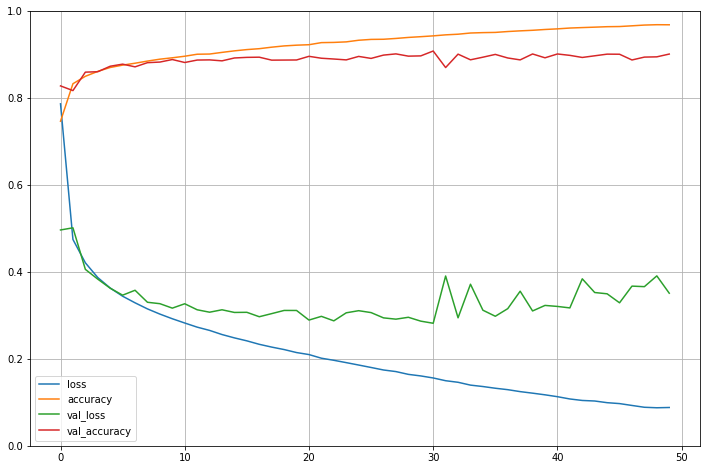

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


pd.DataFrame(history.history).plot(figsize = (12,8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [20]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 79.7398 - accuracy: 0.8462


[79.73978424072266, 0.8461999893188477]

In [21]:
#Using the Model to Make Predictions
x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
y_pred = model.predict_classes(x_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [24]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [25]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)